In [6]:
import EasyLinalg

# Markov Chain
What we want:

$$ A^n * P $$

Where:

* A: State Transition Matrix [Stochastic Matrix]
* n: Number of Steps
* [A]^n: Stabilized Transition Matrix
* P: An Item Element (e.g. Arrow2D, Point3D, Signal)

## Arrow2D

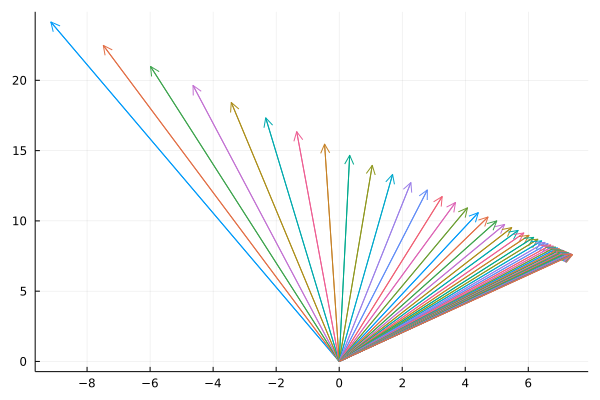

In [7]:
# Defining our state transtion matrix
A = [
    0.95 0.05
    0.05 0.95
    ]

# Choosing a number of steps
n = 50

# Markov Chain in Action
initialArrow2D = Arrow2D(-11, 26)
arrow2DArray = Vector{typeof(initialArrow2D)}()

for step in 1:n
    push!(arrow2DArray, initialArrow2D * A^step )
end

Draw(arrow2DArray)

## Arrow3D

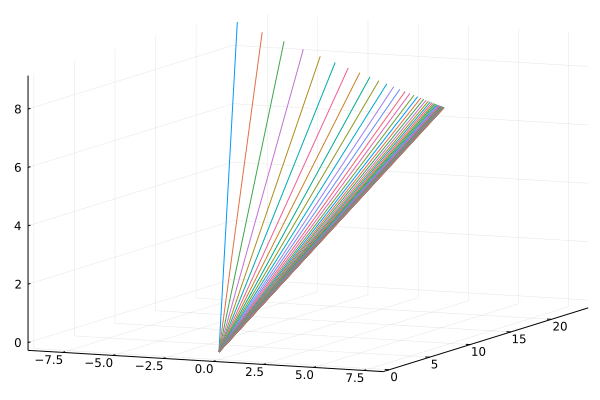

In [8]:
# Defining our state transtion matrix
A = [
    0.92 0.04 0.04
    0.04 0.92 0.04
    0.04 0.04 0.92
    ]

# Choosing a number of steps
n = 50

# Markov Chain in Action
initialArrow3D = Arrow3D(-11, 26, 9)
arrow3DArray = Vector{typeof(initialArrow3D)}()

for step in 1:n
    push!(arrow3DArray, initialArrow3D * A^step )
end

Draw(arrow3DArray)

## Signal

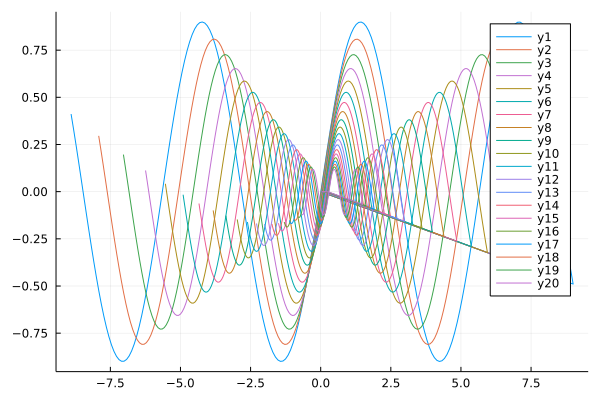

In [9]:

# Choosing a number of steps
n = 20

signal = SignalBuildU(sin, -10:0.1:10)
signalArray = Vector{typeof(signal)}()
signalSize = size(signal.X)[1]

# Defining our state transtion matrix
# 90% chance of staying in same state, 10% chance of moving to others
A = reshape(zeros(size(signal)[1]), 1, :)
for i in 1:signalSize-1
    row = [0.1/signalSize for x in 1:signalSize]
    row[i] = 0.9
    A = [A; reshape(row, 1, :)]
end

# Markov Chain in Action
for step in 1:n
    push!(signalArray, SignalBuild( (signal.X' * A^step)',  (signal.Y' * A^step)') )
end

Draw(signalArray)